In [1]:
from numpy import *
import matplotlib.pyplot as plt
import time as tt
%matplotlib inline
from IPython import display

## 0. Model domain
### Set profile length (80 microns) in cm 
### Set core length (80 microns) in cm 

In [2]:
# Correct coefficients for units
Lx        = 80*1e-4       # set length of the apatite profile in cm (same units as length in D0)
Lc        = 40*1e-4       # set length of the core in cm
yr        = 60*60*24*365  # a year in seconds

## 1. Load data, generate coordinates and visualise 
### Read the data file into 'Sr_data' variable
### Visualise data as function of the coordinate using 'scatter'

In [4]:
# Load data using loadtxt
Sr_data   = loadtxt('strontium')
# Size of profile
n_data    = size(Sr_data) 
# Generate coordinates
x_data    = linspace(-Lx/2, Lx/2, num=n_data)
# Plot the data using scatter
plt.scatter(x_data, Sr_data)

## 2. Physical parameters for the simulations
### Define the gas constant from 8.314 J/mol/K to unit gram calorie 

In [5]:
# Physics
BC        = 2                   # Boundary conditions (1:Dirichlet, 2:Neumann)
C_BC      = 0.06                # Boundary concentration for Dirichlet case
D0        = 2.7e-3              # Reference diffusivity in cm2/sec
E         = 65e3                # Activation energy in cal per mole
R         = 1.987               # Gas constant in Gram calorie
T         = 1000                # Temperature in Celsius

## 3. Numerical parameters
### Define resolution (width of one cell)
### Define position of cell centers (including the 2 extra nodes for east and west boundaries) 

In [6]:
# Numerics
nt        = 600                 # Numver of time steps
ncx       = 100                 # Number of cells
dx        = Lx/ncx              # Resolution
xc        = linspace(-Lx/2-dx/2, Lx/2+dx/2, num=ncx+2) # Coordinates of cell centers
nout      = 50                  # Will show result each nout step

## 4. Preprocessing
### Define the diffusion coefficient using temperature dependent diffusivity
### Contruct the initial concentration profile: the core has .22 and the rim is 0.05

In [7]:
# Preprocessing
D         = D0*exp(-E/R/T)      # precalculate Diffusion coefficient (eq. 4)
# Initialize
C         = 0.05*ones((ncx+2))  # concentration in the rim  of apatite in wt%
C[where(abs(xc)<Lc/2 )]  = 0.22 # concentration in the core of apatite in wt%
C0        = copy(C)             # Save initial for plotting
time      = 0                   # Initial time
# Maximum time step allowed for diffusion
dt  = dx**2/D/2.5               # Courant-Friedrich-Lax criteria
err = zeros(nt)                 # Storage for error

## 5. Computation
### Compute flux 
### Compute concentration
### Code missing boundary conditions
### Interpolate synthetic concentration at the location of profile points (using interp()) 
### Plot synthetic and true concentration 
### Plot evolution of misfit with time

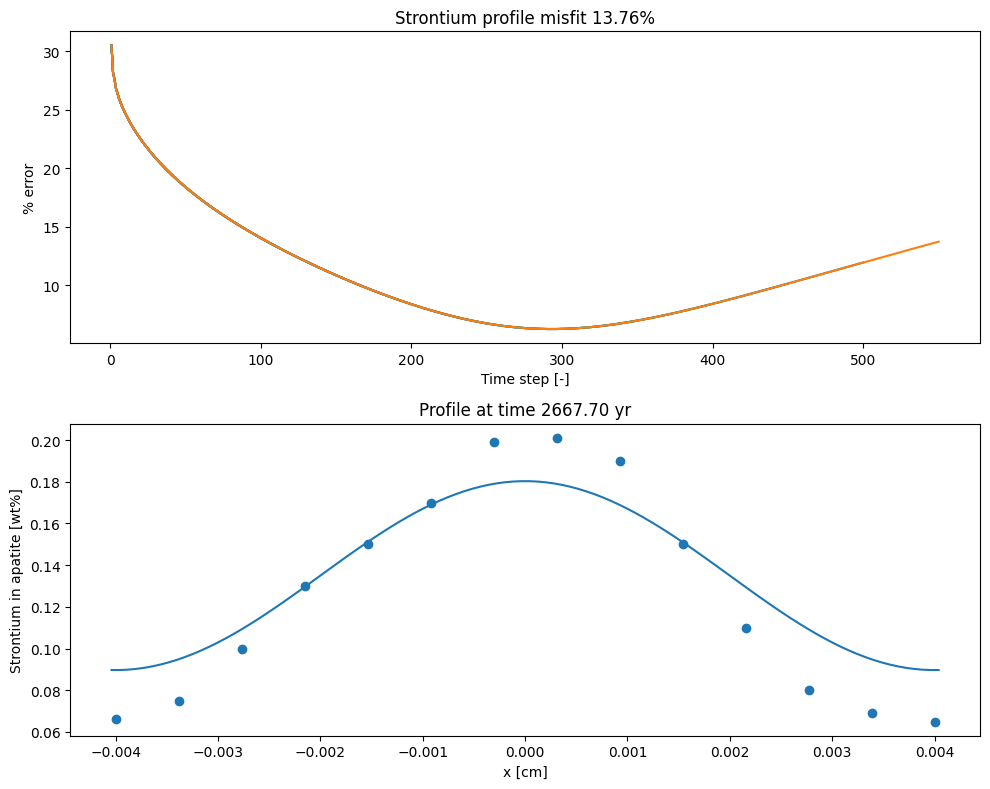

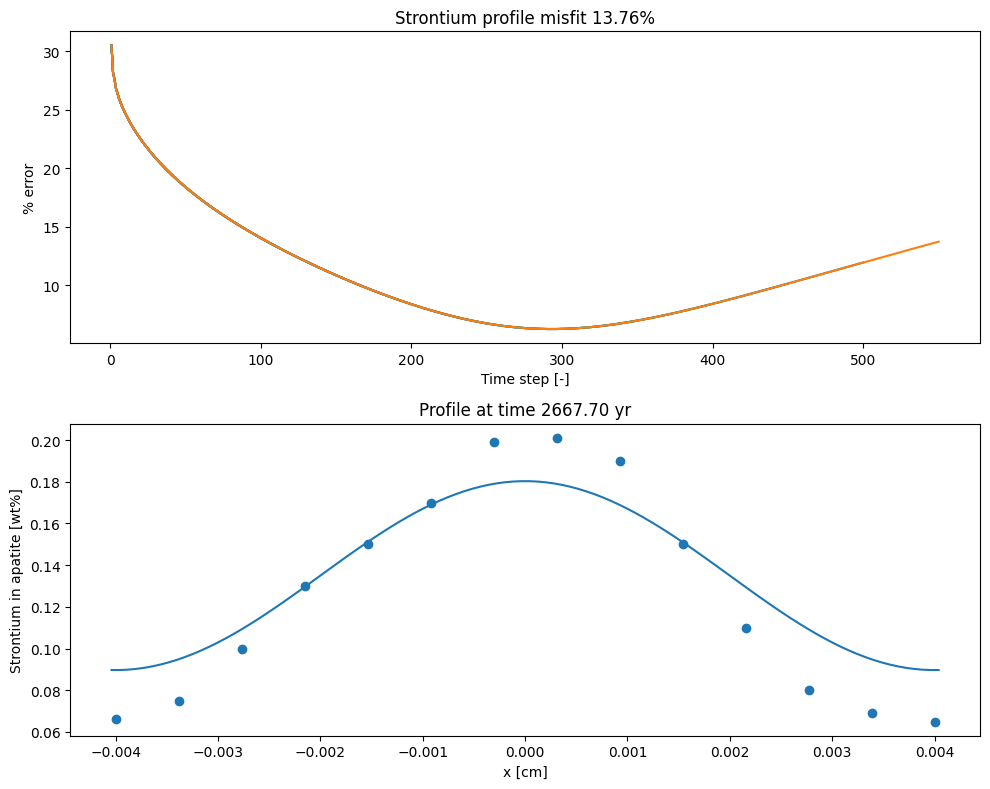

In [8]:
plt.ion()
fig, ax   = plt.subplots(2,figsize=(10, 8)) # Prepare plot
C         = copy(C0)                        # Always start from initial profile ;)
# Time steps
for it in range(nt):
    time    += dt                                     # update the current time (only for plotting)
    J        = -D*diff(C, axis=0)/dx
    C[1:-1]  = C[1:-1]      - dt*diff(J, axis=0)/dx   # balance equation
    if BC==1:
        C[0]   = 2*C_BC - C[1]
        C[-1]  = 2*C_BC - C[-2]
    elif BC==2:
        C[0]   = C[1]
        C[-1]  = C[-2]
    # Misfit
    C_data  = interp(x_data, xc, C)
    err[it] = linalg.norm(Sr_data - C_data) / linalg.norm(C_data)*100
    if it%nout==0:
        ax[0].plot( range(1,it+1), err[0:it])
        ax[0].set_title('Strontium profile misfit ' + '{:.2f}'.format(err[it]) + '%' )        
        ax[0].set_xlabel('Time step [-]')
        ax[0].set_ylabel('% error')
        ax[1].clear()
        plt.scatter(x_data, Sr_data)
        plt.plot(xc, C)
        ax[1].set_xlabel('x [cm]')
        ax[1].set_ylabel('Strontium in apatite [wt%]')
        ax[1].set_title('Profile at time ' + '{:.2f}'.format(time/yr) + ' yr')
        plt.tight_layout()
        display.clear_output(wait=True)
        display.display(plt.gcf())
        tt.sleep(0.1)


## 6. Systematic analysis
### Do model and data fit?
### How does the misfit evolve with time?
### Which type of boundary conditions provide the best fit?
### For temperatures of 600 C, 800 C, 1000 C and 1200 C, what are the durations of diffusion for best-fit? 